# Explore Data 

In [5]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
ppi_data = np.load(f"HW4_data/all_ppi_data.npz")

In [7]:
for i in ppi_data:
    print(i, ppi_data[i])

essential_genes ['LSR1' 'NME1' 'RPR1' ... 'YPR186C' 'YPR187W' 'YPR190C']
gene_names ['YBR119W' 'YBR152W' 'YDL087C' ... 'YNR007C' 'YKR067W' 'YER125W']
is_essential [0 1 1 ... 0 0 1]
ppi_network [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
ppi_network = ppi_data['ppi_network']
gene_names = ppi_data['gene_names']
is_essential = ppi_data['is_essential']
essential_genes = ppi_data['essential_genes']

In [9]:
ppi_network.shape 
gene_names.shape 
is_essential.shape 
essential_genes.shape 

(1430, 1430)

(1430,)

(1430,)

(1128,)

# P 1 

## a 

In [10]:
def plot_degree(plot_values, name='degree_freq'):

    fig, axs = plt.subplots(1, 2)

    axs = axs.flatten()

    for ind, ax in enumerate(axs):

        degree = plot_values[:, 0] if ind else np.log10(plot_values[:, 0])
        freq = plot_values[:, 1] if ind else np.log10(plot_values[:, 1])
        xlabel = 'Degree' if ind else 'Log Degree'
        ylbael = 'Frequency' if ind else 'Log Frequency'
        ax.plot(degree, freq, linewidth=2, color='r')

        ax.set_xlabel(xlabel, fontsize=15)
        ax.set_ylabel(ylbael, fontsize=15)

        ax.tick_params(axis='y', labelsize=12)
        ax.tick_params(axis='x', labelsize=12)

    fig.set_size_inches(14, 6)

    plt.savefig(f'{name}.png', format='png', bbox_inches='tight', dpi=300)


def get_high(number, ppi_network, df):
    high = df.sort_values(by='degree', ascending=False)[:number]
    ind_high = high.index
    gene_high = high.gene.values

    interactions = ppi_network[np.ix_(ind_high, ind_high)].sum() / 2

    return gene_high, interactions


def get_cluster_coeff(gene, ppi_network, df):

    ind = df[df.gene == gene].index.values[0]
    indx = ppi_network[ind] == 1
    supposed_interactions = (indx.sum() * (indx.sum() - 1)) / 2

    if supposed_interactions == 0:
        return 0

    neibor_interactions = ppi_network[np.ix_(indx, indx)].sum() / 2

    return neibor_interactions / supposed_interactions


def plot_coeff(df, name='coeff_degree'):

    fig, ax = plt.subplots()

    df_temp = df.sort_values(by='coeff')

    x = df_temp['coeff'].values
    y = df_temp['degree'].values

    xlabel, ylbael = 'Clustering Coefficient', 'Node Degree'

    ax.plot(x, y, linewidth=2, color='navy')

    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylbael, fontsize=15)

    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)

    fig.set_size_inches(14, 6)

    plt.savefig(f'{name}.png', format='png', bbox_inches='tight', dpi=300)


def p1_solution(ppi_network, gene_names, number=5):

    np.fill_diagonal(ppi_network, 0)
    degree = ppi_network.sum(axis=0)

    df = pd.DataFrame({'gene': gene_names, 'degree': degree})

    values_plot = (df.degree.value_counts().reset_index().sort_values(
        by='index').to_numpy())

    plot_degree(values_plot)

    gene_high, interactions = get_high(number, ppi_network, df)

    print((f'Proteins with the highest degrees: {gene_high}\n'
           f'Interactions: {interactions}'))

    df['coeff'] = df.gene.apply(
        lambda x: get_cluster_coeff(x, ppi_network, df))

    plot_coeff(df)

    return df

## RUN 

In [11]:
ppi_data = np.load(f"HW4_data/all_ppi_data.npz")

ppi_network = ppi_data['ppi_network']

In [12]:
ppi_network.diagonal().sum() 

0

In [20]:
ppi_data = np.load(f"HW4_data/ppi_network_human.npz")

ppi_network = ppi_data['ppi_network']
gene_names = ppi_data['gene_names']



In [19]:
is_essential = ppi_data['is_essential']
essential_genes = ppi_data['essential_genes']


In [21]:
np.fill_diagonal(ppi_network, 0)
degree = ppi_network.sum(axis=0)
df = pd.DataFrame({"gene": gene_names, "degree": degree})

In [27]:
temp_degree = df.degree.value_counts().reset_index().sort_values(by="index").to_numpy()
temp_degree = temp_degree[temp_degree[:,0] > 0]
all_nodes = temp_degree[:,1].sum() 
temp_degree[:, 1] = temp_degree[:,1]/all_nodes

,gene,degree
241,ALDH1A1,0
771,AQP2,0
2600,SULT2A1,0
2610,ALAD,0
3119,GLO1,0
...,...,...
8475,CTH,0
8493,-,0
8871,THRSP,0
8899,QDPR,0


0


(array(['YWHAG', 'TP53', 'EP300', 'CREBBP', 'SRC'], dtype=object), 5.0)

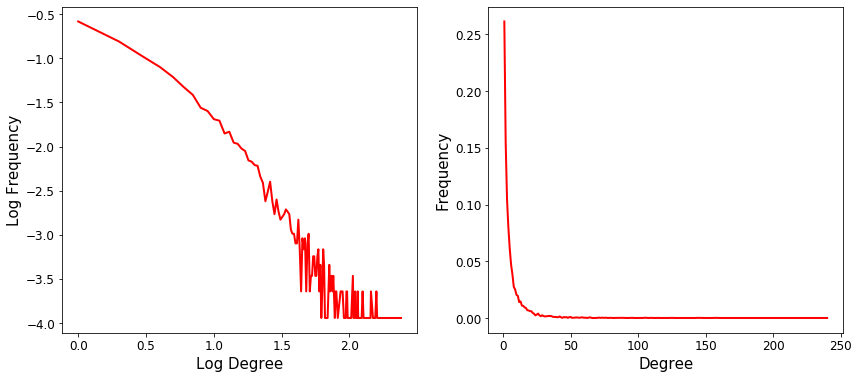

In [45]:


# values_plot = (
#     df.degree.value_counts().reset_index().sort_values(by="index").to_numpy()
    
# )

values_plot = temp_degree
# remove isolated proteins
values_plot = values_plot[values_plot[:, 0] > 0]
print(sum(values_plot[:, 0] == 0))
plot_degree(values_plot)

gene_high, interactions = get_high(5, ppi_network, df)
gene_high, interactions 

Proteins with the highest degrees: ['YCR057C' 'YBR009C' 'YDL055C' 'YBR247C' 'YHR052W']
Interactions: 1.0


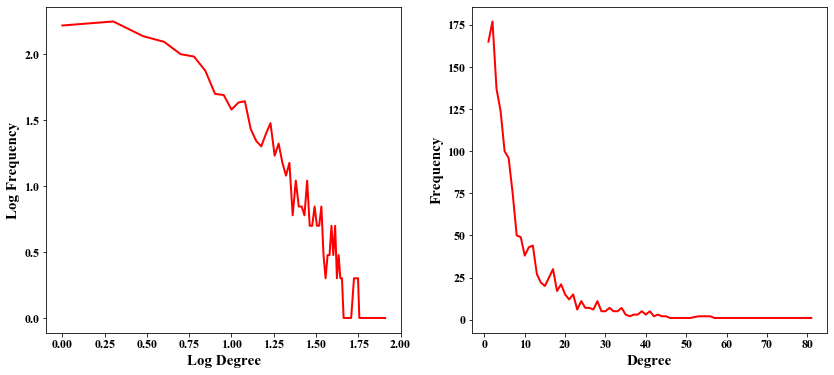

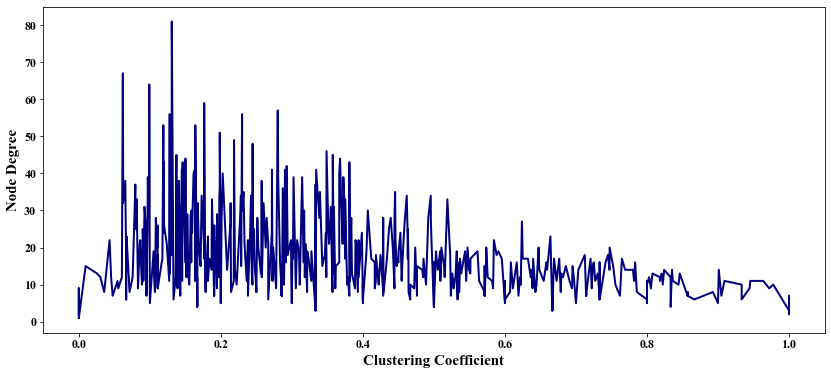

In [89]:
df = p1_solution(ppi_network, gene_names)

In [90]:
df

,gene,degree,coeff
0,YBR119W,11,0.909091
1,YBR152W,19,0.444444
2,YDL087C,22,0.463203
3,YDL175C,5,0.700000
4,YDR235W,11,0.963636
...,...,...,...
1425,YLR386W,1,0.000000
1426,YOR069W,1,0.000000
1427,YNR007C,1,0.000000
1428,YKR067W,1,0.000000


In [65]:
df['isessential']  = is_essential

In [66]:
df 

,gene,degree,coeff,isessential
0,YBR119W,11,0.909091,0
1,YBR152W,19,0.444444,1
2,YDL087C,22,0.463203,1
3,YDL175C,5,0.700000,0
4,YDR235W,11,0.963636,1
...,...,...,...,...
1425,YLR386W,1,0.000000,0
1426,YOR069W,1,0.000000,0
1427,YNR007C,1,0.000000,0
1428,YKR067W,1,0.000000,0


In [31]:
np.fill_diagonal?

In [67]:
plot_values = (df.degree.value_counts()
     .reset_index()
     .sort_values(by = 'index')
     .to_numpy())

Text(0.5, 0, 'Log Degree')

Text(0, 0.5, 'Log Frequency')

Text(0.5, 0, 'Degree')

Text(0, 0.5, 'Frequency')

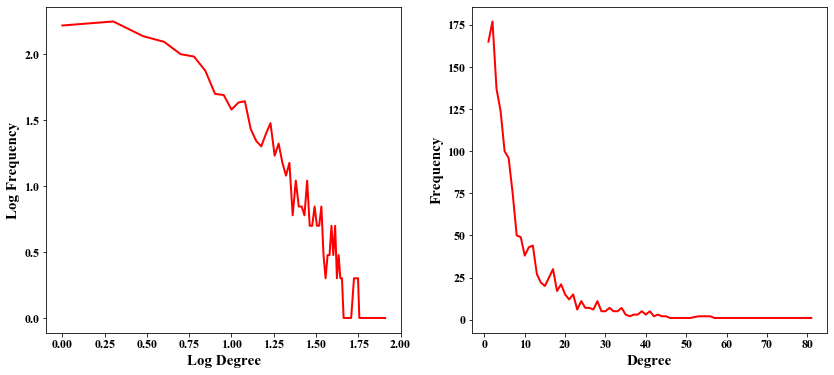

In [68]:
plt.rc('font', family='Times New Roman')

fig, axs = plt.subplots(1,2)

axs = axs.flatten() 

for ind, ax in enumerate(axs): 

    degree = plot_values[:,0] if ind else np.log10(plot_values[:,0])
    freq = plot_values[:,1] if ind else np.log10(plot_values[:,1])
    xlabel = 'Degree' if ind else 'Log Degree'
    ylbael = 'Frequency' if ind else 'Log Frequency'
    ax.plot(degree, freq, linewidth=2, color='r')

    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylbael, fontsize=15)

    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)



fig.set_size_inches(14, 6)

plt.savefig(f'degree_frequency.png',  
			format='png',  
			bbox_inches='tight',  
			dpi=300  
			)


### highest 5 

In [69]:
high5 = df.sort_values(by='degree',ascending=False)[:5]
ind_high5 = high5.index 
gene_high5 = high5.gene.values 

In [70]:
gene_high5

array(['YCR057C', 'YBR009C', 'YDL055C', 'YBR247C', 'YHR052W'],
      dtype=object)

In [100]:
# only 1 interaction 
ppi_network[np.ix_(ind_high5, ind_high5)]


array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

## b 

In [71]:
df 

,gene,degree,coeff,isessential
0,YBR119W,11,0.909091,0
1,YBR152W,19,0.444444,1
2,YDL087C,22,0.463203,1
3,YDL175C,5,0.700000,0
4,YDR235W,11,0.963636,1
...,...,...,...,...
1425,YLR386W,1,0.000000,0
1426,YOR069W,1,0.000000,0
1427,YNR007C,1,0.000000,0
1428,YKR067W,1,0.000000,0


In [138]:
def get_cluster_coeff(gene): 
    ind= df[df.gene == gene].index.values[0]
    indx = ppi_network[ind] == 1 
    return ppi_network[np.ix_(indx, indx)].sum()/2

In [142]:
df['coeff'] = df.gene.map(get_cluster_coeff)

In [143]:
df 

,gene,degree,isessential,coeff
0,YBR119W,11,0,50.0
1,YBR152W,19,1,76.0
2,YDL087C,22,1,107.0
3,YDL175C,5,0,7.0
4,YDR235W,11,1,53.0
...,...,...,...,...
1425,YLR386W,1,0,0.0
1426,YOR069W,1,0,0.0
1427,YNR007C,1,0,0.0
1428,YKR067W,1,0,0.0


,gene,degree,isessential,coeff
1429,YER125W,1,1,0.0
635,YJL155C,1,0,0.0
634,YLL001W,2,0,0.0
1268,YKR027W,2,0,0.0
1272,YDR499W,2,1,0.0
...,...,...,...,...
145,YOL077C,45,1,354.0
318,YMR229C,56,1,354.0
400,YPR016C,46,1,361.0
87,YCR057C,81,1,424.0


In [148]:
df 

,gene,degree,isessential,coeff
0,YBR119W,11,0,50.0
1,YBR152W,19,1,76.0
2,YDL087C,22,1,107.0
3,YDL175C,5,0,7.0
4,YDR235W,11,1,53.0
...,...,...,...,...
1425,YLR386W,1,0,0.0
1426,YOR069W,1,0,0.0
1427,YNR007C,1,0,0.0
1428,YKR067W,1,0,0.0


In [150]:
df_temp['coeff'].values 

array([  0.,   0.,   0., ..., 361., 424., 447.])

Text(0.5, 0, 'Clustering Coefficient')

Text(0, 0.5, 'Node Degree')

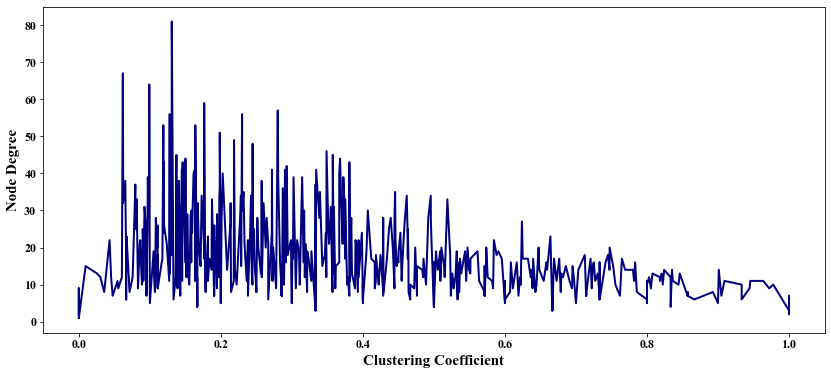

In [72]:
plt.rc('font', family='Times New Roman')

fig, ax = plt.subplots()

df_temp = df.sort_values(by='coeff')

x = df_temp['coeff'].values
y = df_temp['degree'].values

xlabel, ylbael  = 'Clustering Coefficient', 'Node Degree'

ax.plot(x, y, linewidth=2, color='navy')

ax.set_xlabel(xlabel, fontsize=15)
ax.set_ylabel(ylbael, fontsize=15)

ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)



fig.set_size_inches(14, 6)

# plt.savefig(f'degree_frequency.png',  
# 			format='png',  
# 			bbox_inches='tight',  
# 			dpi=300  
# 			)

# P 2 

In [77]:
def p2_solution(gene_id: list, df):
    
    result = df.set_index('gene').loc[gene_id, :]
    print(result)
    


# df.set_index('gene').loc[['YNL110C','YML085C'], :]
p2_solution(['YNL110C','YML085C'], df)

         degree     coeff  isessential
gene                                  
YNL110C      39  0.372470            1
YML085C      39  0.097166            1


# P3 

In [78]:
from scipy.stats import ranksums 
def p3_solution(df):
    group_0 = df[df.isessential == 0].degree.values 
    group_1 = df[df.isessential == 1].degree.values 
    s, p = ranksums(group_0, group_1)
    
    return s, p 

In [79]:
p3_solution(df)

(-10.488778541643851, 9.727778738411195e-26)

In [174]:
df 

,gene,degree,isessential,coeff
0,YBR119W,11,0,50.0
1,YBR152W,19,1,76.0
2,YDL087C,22,1,107.0
3,YDL175C,5,0,7.0
4,YDR235W,11,1,53.0
...,...,...,...,...
1425,YLR386W,1,0,0.0
1426,YOR069W,1,0,0.0
1427,YNR007C,1,0,0.0
1428,YKR067W,1,0,0.0


In [176]:
from scipy.stats import ranksums 

In [181]:
group_0 = df[df.isessential == 0].degree.values 
group_1 = df[df.isessential == 1].degree.values 

In [185]:
s, p = ranksums(group_0, group_1)

In [187]:
p 

9.727778738411195e-26

In [183]:
from scipy.stats import ttest_ind

In [184]:
ttest_ind(group_0, group_1)

Ttest_indResult(statistic=-8.855810749591601, pvalue=2.4111090931471354e-18)

# p 4 

In [3]:
data_h = np.load('./HW4_data/ppi_network_human.npz')

In [8]:
list(data_h.keys())

['gene_names', 'ppi_network']

In [9]:
network = data_h['ppi_network']
gene_name = data_h['gene_names']

/Users/liyang/miniconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


Proteins with the highest degrees: ['YWHAG' 'TP53' 'EP300' 'CREBBP' 'SRC']
Interactions: 5.0


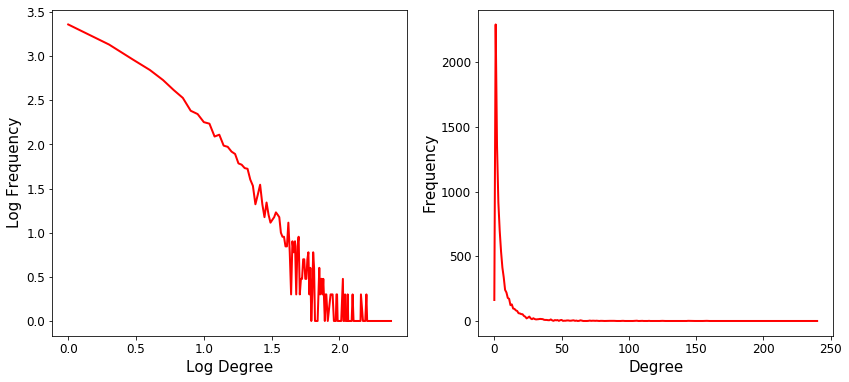

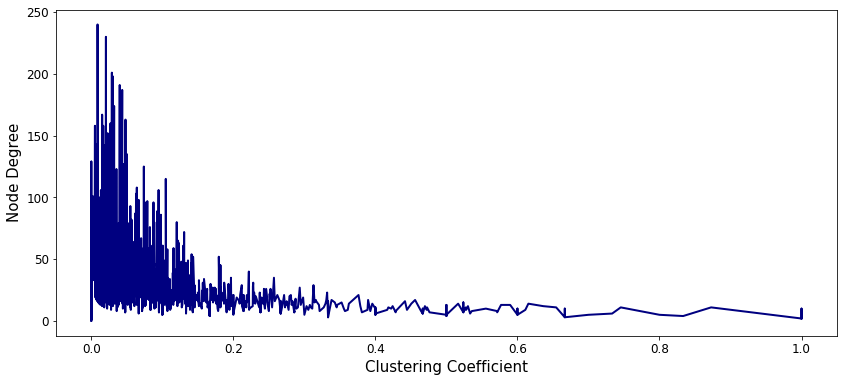

In [10]:
df_h = p1_solution(network, gene_name)

In [11]:
df_h[df_h['coeff'] > 1 ] 

,gene,degree,coeff


In [14]:
df_h[df_h.degree == 0] 

,gene,degree,coeff
241,ALDH1A1,0,0.0
771,AQP2,0,0.0
2600,SULT2A1,0,0.0
2610,ALAD,0,0.0
3119,GLO1,0,0.0
...,...,...,...
8475,CTH,0,0.0
8493,-,0,0.0
8871,THRSP,0,0.0
8899,QDPR,0,0.0


In [17]:
high = df_h.sort_values(by='degree',ascending=False)[:5]
ind_high = high.index 
gene_high = high.gene.values 

network[np.ix_(ind_high, ind_high)]

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
def plot_degree(plot_values, name='degree_freq'):

    fig, axs = plt.subplots(1,2)

    axs = axs.flatten() 

    for ind, ax in enumerate(axs): 

        degree = plot_values[:,0] if ind else np.log10(plot_values[:,0])
        freq = plot_values[:,1] if ind else np.log10(plot_values[:,1])
        xlabel = 'Degree' if ind else 'Log Degree'
        ylbael = 'Frequency' if ind else 'Log Frequency'
        ax.plot(degree, freq, linewidth=2, color='r')

        ax.set_xlabel(xlabel, fontsize=15)
        ax.set_ylabel(ylbael, fontsize=15)

        ax.tick_params(axis='y', labelsize=12)
        ax.tick_params(axis='x', labelsize=12)


    fig.set_size_inches(14, 6)

    plt.savefig(f'{name}.png',  
                format='png',  
                bbox_inches='tight',  
                dpi=300  
                )


def get_high(number, ppi_network, df):
    high = df.sort_values(by='degree',ascending=False)[:number]
    ind_high = high.index 
    gene_high = high.gene.values 
    
    interactions = ppi_network[np.ix_(ind_high, ind_high)].sum()/2
    
    return gene_high, interactions
    
def get_cluster_coeff(gene, ppi_network, df):  
    
    ind= df[df.gene == gene].index.values[0]
    indx = ppi_network[ind] == 1 
    supposed_interactions  = (indx.sum() * (indx.sum() - 1))/2
    
    if supposed_interactions == 0:
            return  0

    neibor_interactions = ppi_network[np.ix_(indx, indx)].sum()/2    
    
    return neibor_interactions/supposed_interactions


def plot_coeff(df, name='coeff_degree'):

    fig, ax = plt.subplots()

    df_temp = df.sort_values(by='coeff')

    x = df_temp['coeff'].values
    y = df_temp['degree'].values

    xlabel, ylbael  = 'Clustering Coefficient', 'Node Degree'

    ax.plot(x, y, linewidth=2, color='navy')

    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylbael, fontsize=15)

    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)

    fig.set_size_inches(14, 6)

    plt.savefig(f'{name}.png',  
    			format='png',  
    			bbox_inches='tight',  
    			dpi=300  
    			)

    

def p1_solution(ppi_network, gene_names, number=5):
    
    degree = ppi_network.sum(axis=0)
    
    df = pd.DataFrame({'gene': gene_names, 'degree': degree})
    
    values_plot = (df.degree.value_counts()
     .reset_index()
     .sort_values(by = 'index')
     .to_numpy())
                   
        
    plot_degree(values_plot) 
    
    gene_high, interactions = get_high(number, ppi_network, df) 
    
        
    print((f'Proteins with the highest degrees: {gene_high}\n'
           f'Interactions: {interactions}'))
    

    df['coeff'] = df.gene.apply(lambda x :get_cluster_coeff(x,  ppi_network, df))
    
    plot_coeff(df)
    
    return df 
    
    

In [ ]:

    degree = ppi_network.sum(axis=0)
    
    df = pd.DataFrame({'gene': gene_names, 'degree': degree})
    
    values_plot = (df.degree.value_counts()
     .reset_index()
     .sort_values(by = 'index')
     .to_numpy())
                   
        
    plot_degree(values_plot) 
    
    gene_high, interactions = get_high(number, ppi_network, df) 
    
        
    print((f'Proteins with the highest degrees: {gene_high}\n'
           f'Interactions: {interactions}'))
    

    df['coeff'] = df.gene.apply(lambda x :get_cluster_coeff(x,  ppi_network, df))
    
    plot_coeff(df)

0

In [ ]:
    high = df.sort_values(by='degree',ascending=False)[:number]
    ind_high = high.index 
    gene_high = high.gene.values 
    
    interactions = ppi_network[np.ix_(ind_high, ind_high)].sum()/2